2019-June-13, Thursday

Make images that need to be stitched together as a video:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
N = 32 #Number of images to be stitched.

In [3]:
t_List = np.linspace(0, 10, N)

In [4]:
x_List = np.sin(t_List)
y_List = 0.8*np.cos(t_List) + 0.2*np.sin(t_List)

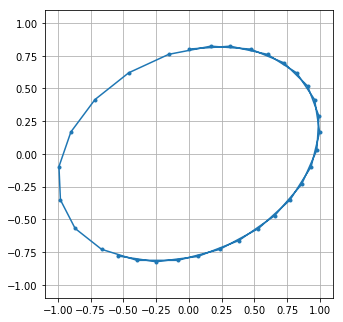

In [5]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], aspect="equal",
                  xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))

ax.plot(x_List, y_List, ".-")

plt.grid()
plt.show()

In [6]:
FigDir = "FigsForAnim"
if not os.path.exists(FigDir):
    os.mkdir(FigDir)

In [7]:
for ii in range(N):
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], aspect="equal",
                      xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))
    
    ax.plot(x_List[:ii+1], y_List[:ii+1], "C0o-", alpha=0.5)
    
    ax.plot([0, x_List[ii]], [0, y_List[ii]], "ro-")
    
    ax.grid()
    FigName = "{}/MyFig{}.png".format(FigDir, ii)
    plt.savefig(FigName, format="png", transparent=False,
                bbox_inches="tight", pad_inches=0.1)
    plt.close()
print ("Done!")

Done!


---

Stitch figures together to make video:

In [8]:
import cv2
#download this from conda: conda install opencv

https://www.life2coding.com/convert-image-frames-video-file-using-opencv-python/

In [9]:
def convert_frames_to_video(NumOfImages, InDir, pathOut, fps):
    # MAKE SURE THE FILENAMES OF IMAGES TO BE STITCHED ARE CORRECT!!!
    files = ['{}/MyFig{}.png'.format(InDir, ii) for ii in range(NumOfImages)]
    
    frame_array = []
    for i in range(NumOfImages):
        #Reading each file:
        filename = files[i]
        
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        # print(filename)
        
        #Inserting the frames into an image array:
        frame_array.append(img)
        
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    
    for i in range(NumOfImages):
        #Writing to a image array:
        out.write(frame_array[i])
    out.release()

In [10]:
OutVidName = 'video.avi'
fps = 5.0
convert_frames_to_video(N, FigDir, OutVidName, fps)

In [11]:
!open video.avi
#open and run the video.